<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy

In [64]:
import numpy as np

In [92]:
import matplotlib

In [93]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$. 

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_-3.0.png?raw=true" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_-2.0.png?raw=true" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_1.7.png?raw=true" width="600"/>

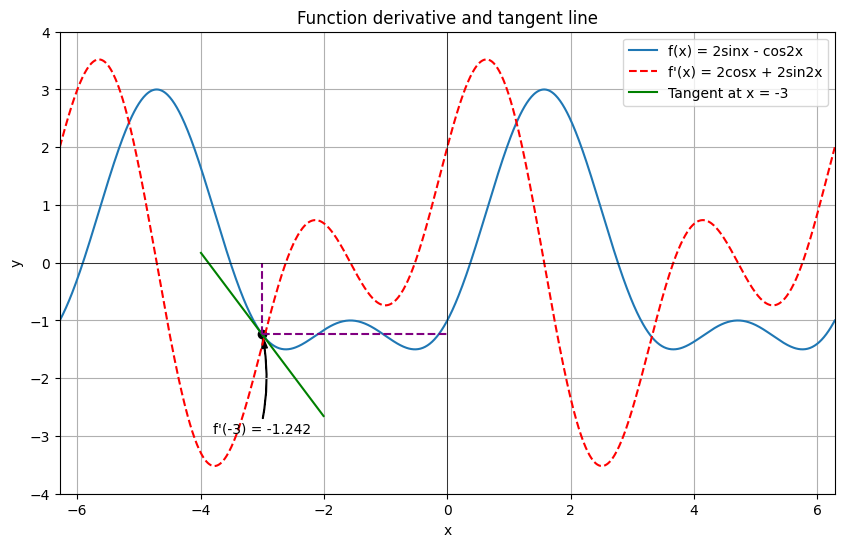

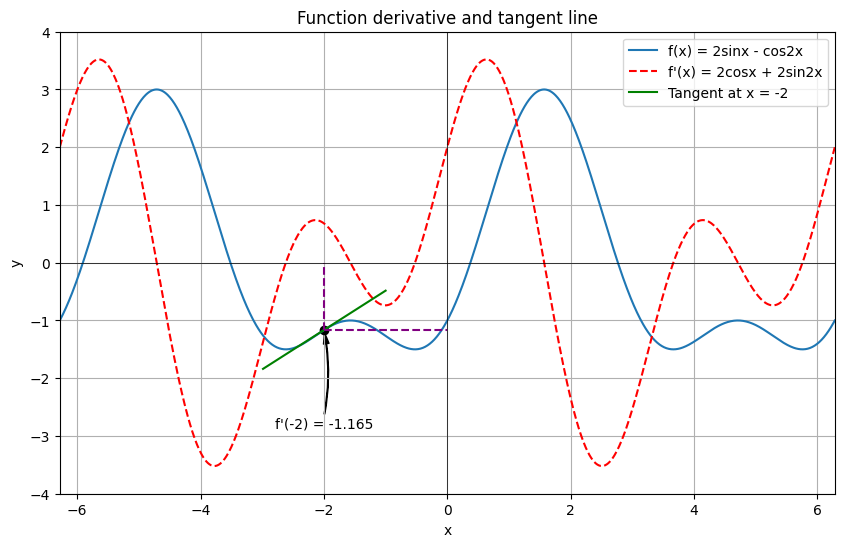

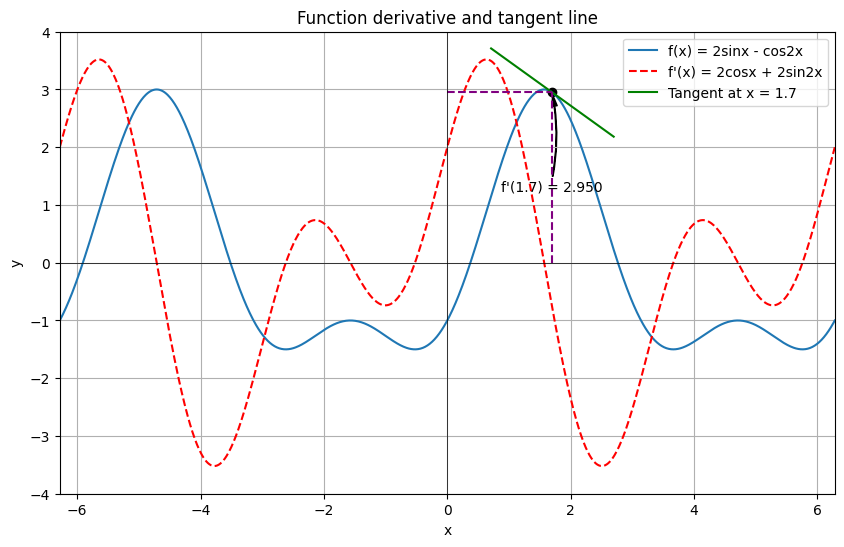

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def f(x):
    return 2*np.sin(x) - np.cos(2*x)

def f_derivative(x):
    return 2*np.cos(x) + 2*np.sin(2*x)

def tangent_line(x, x_val):
    return f_derivative(x_val)*(x - x_val) + f(x_val)

def beauty_derivative_plot(x_val):
    y_val = f(x_val)
    x = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y = f(x)
    
    
    plt.figure(figsize=(10, 6))
    plt.xlim(-2*np.pi, 2*np.pi)
    plt.ylim(-4, 4)
    plt.plot(x_val, y_val, 'ko')
    plt.plot(x, y, label='f(x) = 2sinx - cos2x')
    
    derivative_values = f_derivative(x)
    plt.plot(x, derivative_values, label="f'(x) = 2cosx + 2sin2x", color='r', linestyle='--',)
    
    tangent_range = (x >= x_val - 1) & (x <= x_val + 1)
    
    tangent = tangent_line(x, x_val)
    plt.plot(x[tangent_range], tangent[tangent_range], label=f"Tangent at x = {x_val}", color='green')
    
    x_val_pos = (2*np.pi + x_val) / (4*np.pi)
    y_val_pos = (4 + y_val) / 8
    plt.axvline(x=x_val, color='purple', linestyle='--', ymin=min(y_val_pos, 1/2), ymax=max(y_val_pos, 1/2))
    plt.axhline(y=y_val, color='purple', linestyle='--', xmin=min(x_val_pos, 1/2), xmax=max(x_val_pos, 1/2))
    
    plt.axvline(x=0, color='black', linewidth=0.5)
    plt.axhline(y=0, color='black', linewidth=0.5)
    
    style = "Simple, tail_width=0.5, head_width=4, head_length=8"
    kw = dict(arrowstyle=style, color="k")
    a3 = patches.FancyArrowPatch((x_val, y_val-1.5), (x_val, y_val),
                                 connectionstyle="arc3,rad=.1", **kw)
    plt.gca().add_patch(a3)
    plt.text(x_val, y_val-1.7, f"f'({x_val}) = {y_val:.3f}", horizontalalignment='center')
    
    
    plt.title("Function derivative and tangent line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


beauty_derivative_plot(-3)
beauty_derivative_plot(-2) 
beauty_derivative_plot(1.7) 

## Problem 2

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with 
```python
np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
```
and do the following exercises **without for-loops**.

In [116]:
data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

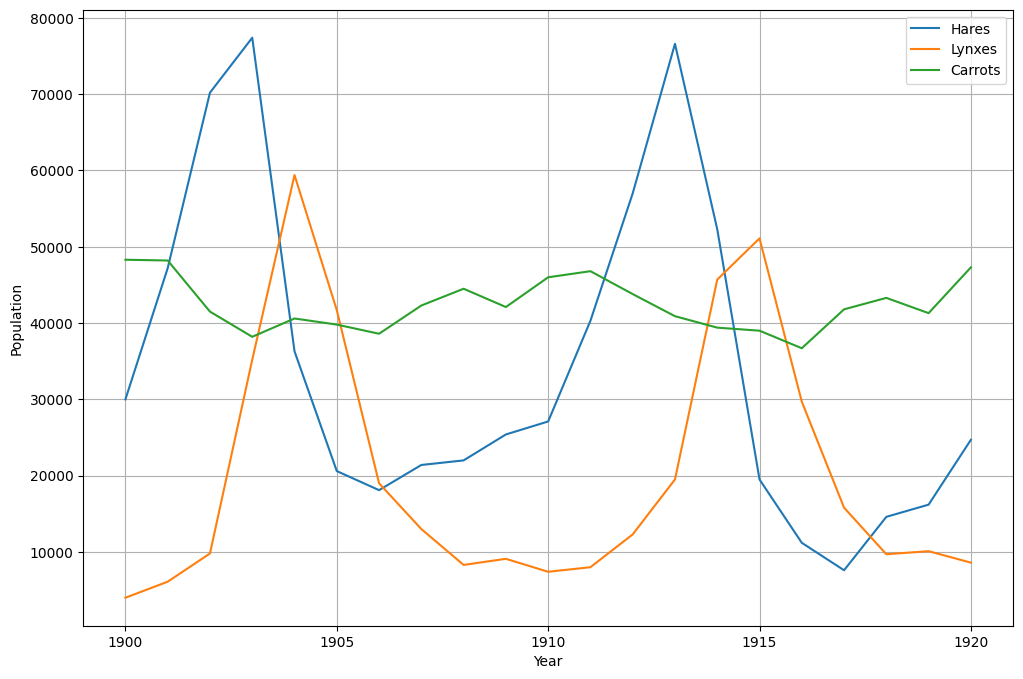

In [76]:
plt.figure(figsize=(12, 8))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')
plt.xticks(np.arange(1900, 1921, 5))
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

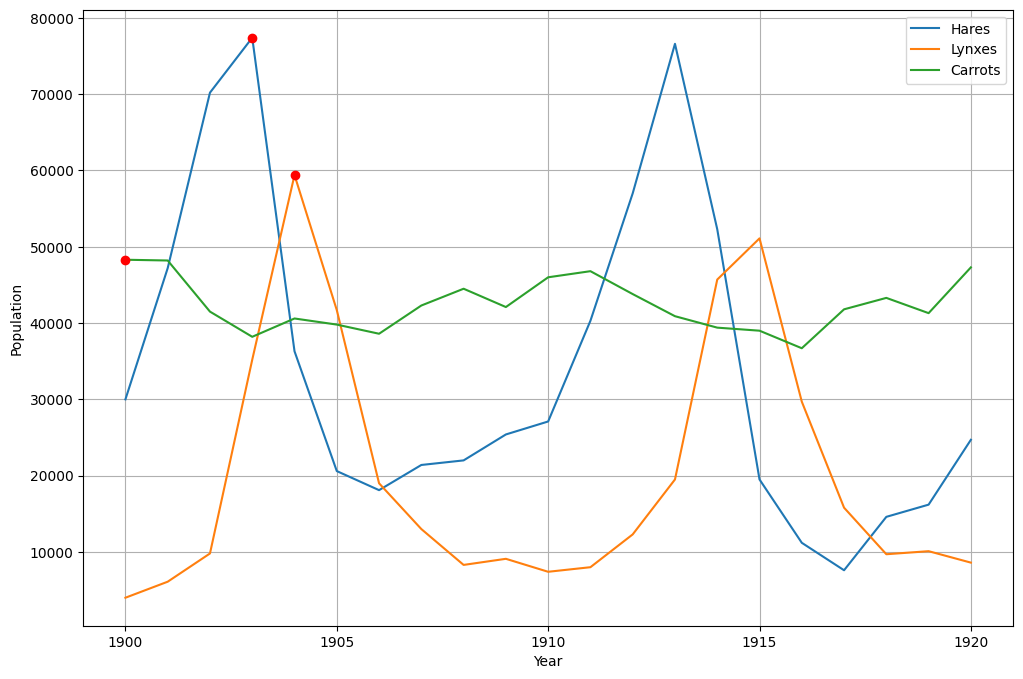

In [93]:
max_hares_year = years[np.argmax(hares)]
max_lynxes_year = years[np.argmax(lynxes)]
max_carrots_year = years[np.argmax(carrots)]

plt.figure(figsize=(12, 8))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')
plt.plot(max_hares_year, np.max(hares), 'ro')
plt.plot(max_lynxes_year, np.max(lynxes), 'ro')
plt.plot(max_carrots_year, np.max(carrots), 'ro')
plt.xticks(np.arange(1900, 1921, 5))
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

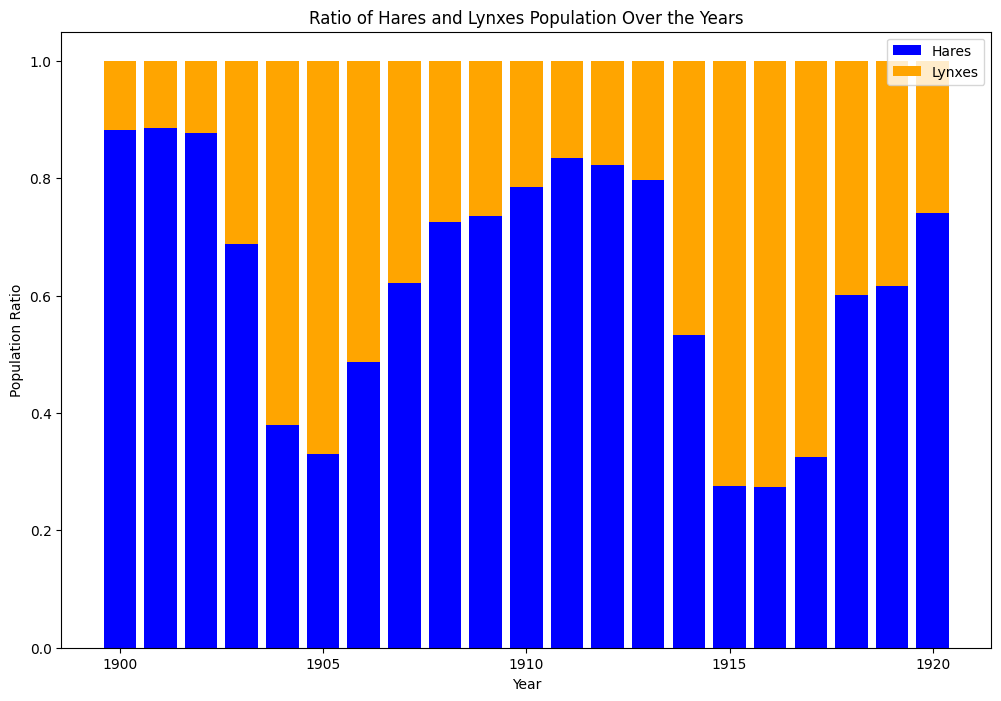

In [94]:
total_population = hares + lynxes
hares_ratio = hares / total_population
lynxes_ratio = lynxes / total_population

plt.figure(figsize=(12, 8))
plt.bar(years, hares_ratio, label='Hares', color='b')
plt.bar(years, lynxes_ratio, bottom=hares_ratio, label='Lynxes', color='orange')
plt.title('Ratio of Hares and Lynxes Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Population Ratio')
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

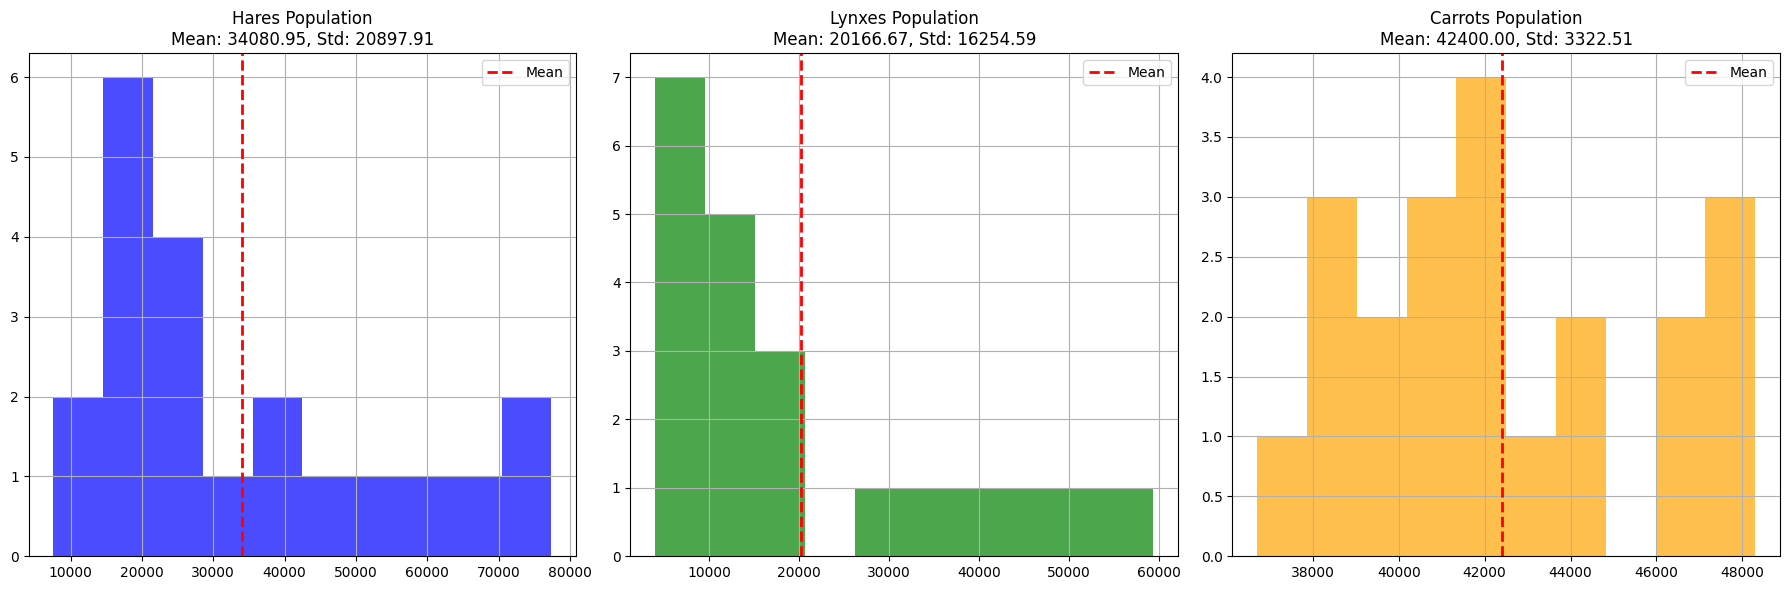

In [98]:
hares_mean, hares_std = np.mean(hares), np.std(hares)
lynxes_mean, lynxes_std = np.mean(lynxes), np.std(lynxes)
carrots_mean, carrots_std = np.mean(carrots), np.std(carrots)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(hares, color='b', alpha=0.7, bins=10)
plt.axvline(hares_mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Hares Population\nMean: {:.2f}, Std: {:.2f}'.format(hares_mean, hares_std))
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(lynxes, color='g', alpha=0.7, bins=10)
plt.axvline(lynxes_mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Lynxes Population\nMean: {:.2f}, Std: {:.2f}'.format(lynxes_mean, lynxes_std))
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(carrots, color='orange', alpha=0.7, bins=10)
plt.axvline(carrots_mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Carrots Population\nMean: {:.2f}, Std: {:.2f}'.format(carrots_mean, carrots_std))
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


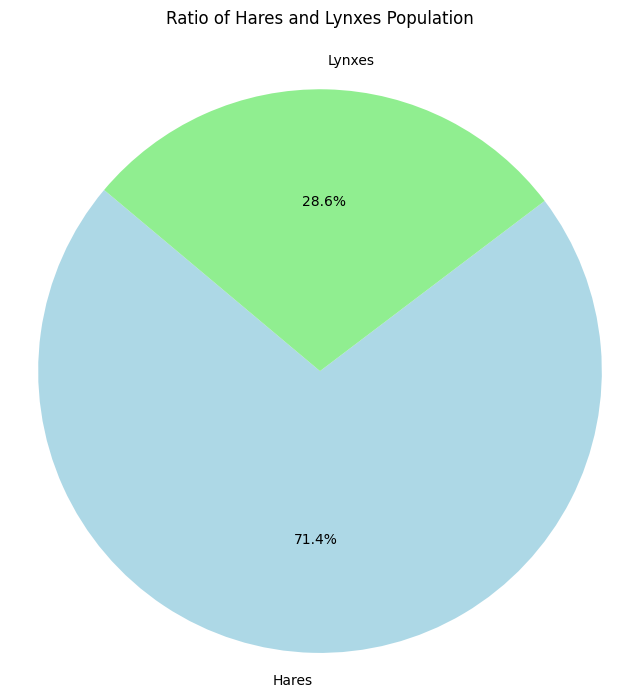

In [102]:
largest_species = ['H' if hares[i] > lynxes[i] else 'L' for i in range(len(years))]

print(largest_species)

count_hares = largest_species.count('H')
count_lynxes = largest_species.count('L')

labels = ['Hares', 'Lynxes']
sizes = [count_hares, count_lynxes]
colors = ['lightblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Ratio of Hares and Lynxes Population', y=1.05)
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

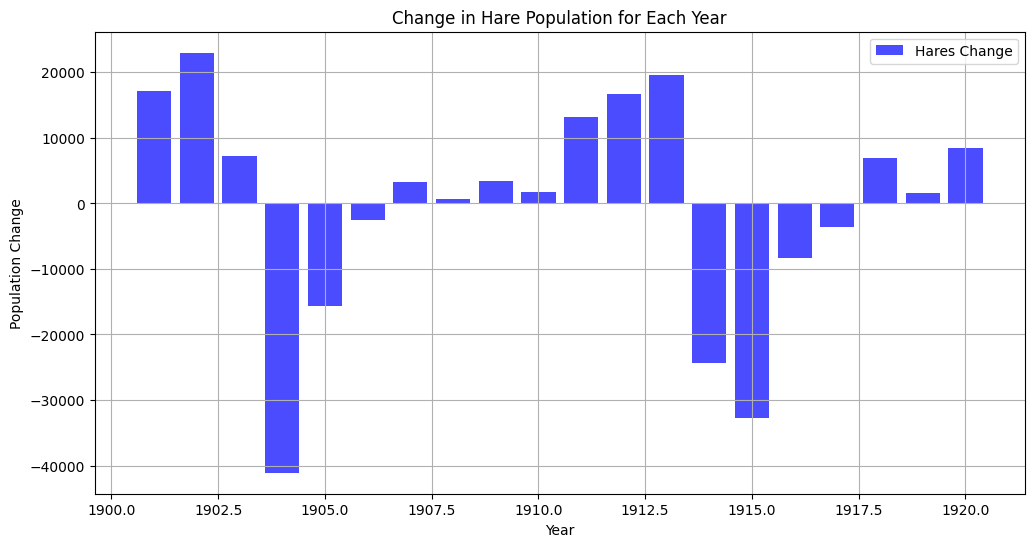

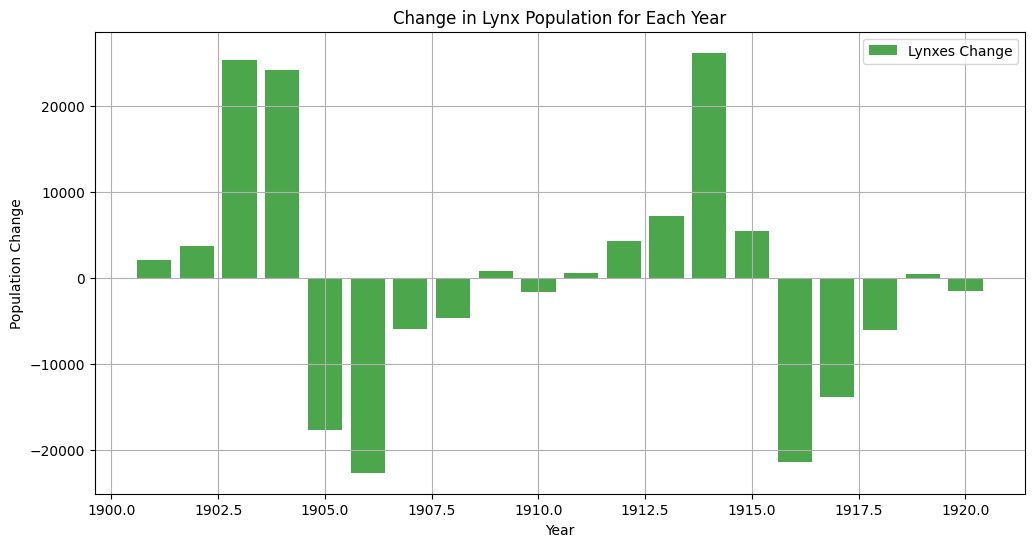

Correlation Coefficient between Hares and Lynxes: 0.07


In [105]:
hares_change = np.diff(hares)
lynxes_change = np.diff(lynxes)

plt.figure(figsize=(12, 6))
plt.bar(years[1:], hares_change, color='b', alpha=0.7, label='Hares Change')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Change in Hare Population for Each Year')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(years[1:], lynxes_change, color='g', alpha=0.7, label='Lynxes Change')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Change in Lynx Population for Each Year')
plt.legend()
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(hares, lynxes)[0, 1]
print(f"Correlation Coefficient between Hares and Lynxes: {correlation_coefficient:.2f}")

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

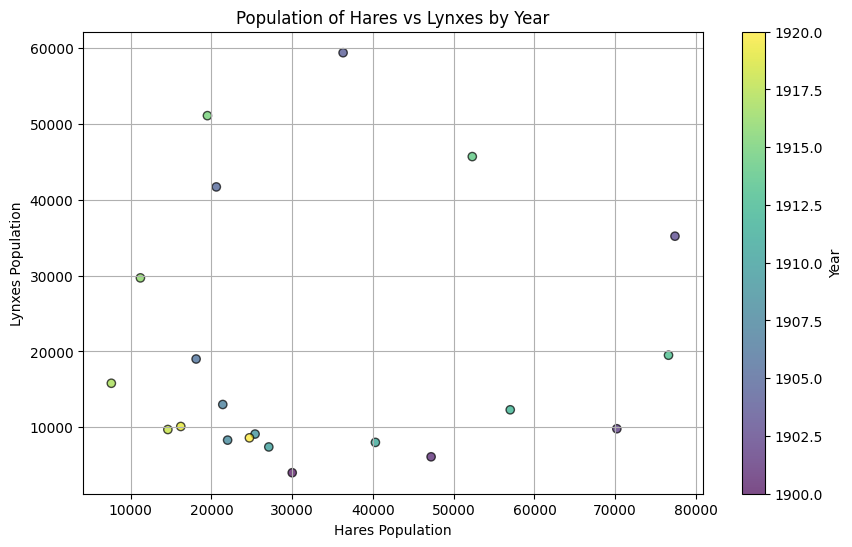

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(hares, lynxes, c=years, cmap='viridis', alpha=0.7, edgecolors='k', linewidths=1)
plt.colorbar(label='Year')
plt.xlabel('Hares Population')
plt.ylabel('Lynxes Population')
plt.title('Population of Hares vs Lynxes by Year')
plt.grid(True)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [122]:
known_years = years[years < 1920][-5:]
known_hares = hares[years < 1920][-5:]

estimated_hares_1920 = np.mean(known_hares)

true_hares_1920 = hares[years == 1920]

error_ratio = abs(estimated_hares_1920 - true_hares_1920) / true_hares_1920

print("Estimated Hares Population in 1920:", estimated_hares_1920)
print("True Hares Population in 1920:", true_hares_1920[0])
print("Error Ratio compared to the True Value:", error_ratio[0])

Estimated Hares Population in 1920: 13820.0
True Hares Population in 1920: 24700.0
Error Ratio compared to the True Value: 0.4404858299595142
